In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from ekdist import ekrecord
from ekdist import ekplot
from ekdist import eklib
from ekdist import exponentials

In [3]:
rec = ekrecord.SingleChannelRecord()
#infile = "../ekdist/tests/181003S8.SCN"
infile = "../ekdist/tests/AChsim.scn"
rec.load_SCN_file(infile)
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 0.0 microseconds
Number of resolved intervals = 13948
Number of time periods = 13948

Number of open periods = 6974
Mean and SD of open periods = 1102.017283440 +/- 1566.336870193 ms
Range of open periods from 0.010006604 ms to 14774.831771851 ms

Number of shut intervals = 6974
Mean and SD of shut periods = 0.428573112 +/- 0.639318256 ms
Range of shut periods from 0.010021283 ms to 7.095655892 ms


In [4]:
rec.tres = 20e-6
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 20.0 microseconds
Number of resolved intervals = 11534
Number of time periods = 10547

Number of open periods = 5274
Mean and SD of open periods = 0.567264098 +/- 0.926454959 ms
Range of open periods from 0.020000165 ms to 10.221111588 ms

Number of shut intervals = 5273
Mean and SD of shut periods = 1456.536531448 +/- 1857.480764389 ms
Range of shut periods from 0.020004012 ms to 14919.385910034 ms


### Amplitudes

Average open amplitude =  5.954307667684909


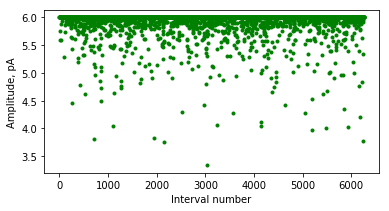

In [5]:
fc = 3000 # 3 kHz
fig = ekplot.stability_amplitudes(rec, window=1)
#plt.savefig('stability_amplitudes.png')

Range of amplitudes: 5.471 - 6.000


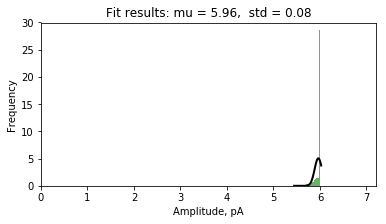

In [6]:
fig = ekplot.histogram_fitted_amplitudes(rec, fc, n=2, gauss=True)
#plt.savefig('histogram_fitted_amplitudes.png')

### Stability plots: open periods, shut periods, Popen

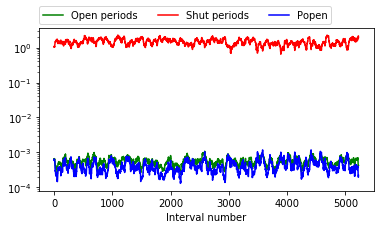

In [7]:
fig = ekplot.stability_intervals(rec, window=50)
#plt.savefig('stability_open_shut_Popen.png')

### Open periods

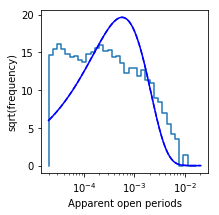

In [8]:
open_periods = rec.periods.get_open_intervals()
fig = ekplot.histogram_xlog_ysqrt_data(open_periods, rec.tres, xlabel='Apparent open periods')

In [9]:
tau1, area1 = [1e-4, 1e-3, 1e-2], [0.3, 0.3]
epdf1 = exponentials.ExponentialPDF(tau1, area1)
epdf1.fit(open_periods)
# TODO: get printed approximate SD of the estimates

Start LogLikelihood = -34705.6927527449
Optimization terminated successfully.
Final LogLikelihood = -35888.025203

Tau = 0.000021; lambda (1/s)= 48411.443437
Area= 0.345942; predicted number of intervals = 2456.035;amplitude (1/s) = 16747.562
Tau = 0.000182; lambda (1/s)= 5493.029790
Area= 0.362363; predicted number of intervals = 2572.616;amplitude (1/s) = 1990.471
Tau = 0.001204; lambda (1/s)= 830.568841
Area= 0.291695; predicted number of intervals = 2070.902;amplitude (1/s) = 242.273

Overall mean = 0.000424
Predicted true number of events =  7099.5528561376
Number of fitted =  5274
Predicted number below Ylow = 1825.127; predicted number above Yhigh = 0.426


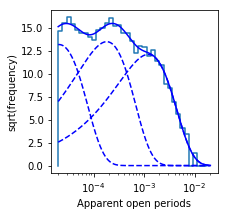

In [10]:
fig = ekplot.histogram_xlog_ysqrt_data(open_periods, rec.tres, pdf=epdf1, xlabel='Apparent open periods')

### Shut periods

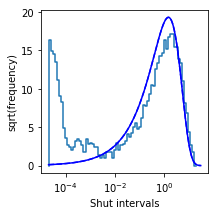

In [11]:
shut_periods = rec.periods.get_shut_intervals()
fig = ekplot.histogram_xlog_ysqrt_data(shut_periods, rec.tres, xlabel='Shut intervals')

In [12]:
tau2, area2 = [2e-5, 2e-3, 2], [0.3, 0.3]
epdf2 = exponentials.ExponentialPDF(tau2, area2)
epdf2.fit(shut_periods)

Start LogLikelihood = -884.273427234114
Optimization terminated successfully.
Final LogLikelihood = -2728.387717

Tau = 0.000017; lambda (1/s)= 58648.151597
Area= 0.481769; predicted number of intervals = 3811.481;amplitude (1/s) = 28254.878
Tau = 0.000599; lambda (1/s)= 1669.847355
Area= 0.016359; predicted number of intervals = 129.424;amplitude (1/s) = 27.317
Tau = 1.942078; lambda (1/s)= 0.514912
Area= 0.501872; predicted number of intervals = 3970.518;amplitude (1/s) = 0.258

Overall mean = 0.974691
Predicted true number of events =  7911.423776791619
Number of fitted =  5273
Predicted number below Ylow = 2636.593; predicted number above Yhigh = 1.830


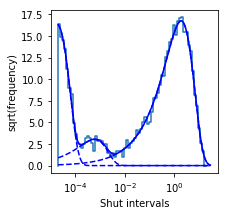

In [13]:
fig = ekplot.histogram_xlog_ysqrt_data(shut_periods, rec.tres, epdf2, xlabel='Shut intervals')

In [14]:
epdf2.get_tcrits(verbose=True)


Equal % misclassified (DC criterion)
Critical time between components 1 and 2
tcrit = 0.091984 ms
% misclassified: short = 0.45406; long = 0.45406
# misclassified (out of 100): short = 0.21875; long = 0.23531
Total # misclassified (out of 100) = 0.45406
Critical time between components 2 and 3
tcrit = 2.0569 ms
% misclassified: short = 0.10586; long = 0.10586
# misclassified (out of 100): short = 0.052731; long = 0.053127
Total # misclassified (out of 100) = 0.10586

Equal # misclassified (Clapham & Neher criterion)
Critical time between components 1 and 2
tcrit = 0.090923 ms
% misclassified: short = 0.4832; long = 0.44921
# misclassified (out of 100): short = 0.23279; long = 0.23279
Total # misclassified (out of 100) = 0.46558
Critical time between components 2 and 3
tcrit = 2.0535 ms
% misclassified: short = 0.10647; long = 0.10568
# misclassified (out of 100): short = 0.053037; long = 0.053037
Total # misclassified (out of 100) = 0.10607

Minimum total # misclassified (Jackson et a

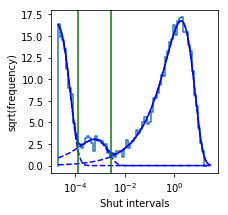

In [15]:
fig = ekplot.histogram_xlog_ysqrt_data(shut_periods, rec.tres, epdf2, 
                                       tcrit=epdf2.tcrits['Jackson'], xlabel='Shut intervals')

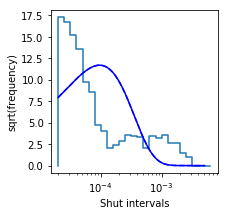

In [16]:
short_shuttings = rec.periods.get_shut_intervals(in_range=[rec.tres, 0.00279])
fig = ekplot.histogram_xlog_ysqrt_data(short_shuttings, rec.tres, xlabel='Shut intervals')

In [17]:
tau2a, area2a = [2e-5, 1e-3], [0.5]
epdf2a = exponentials.ExponentialPDF(tau2a, area2a)
epdf2a.fit(short_shuttings)

Start LogLikelihood = -11291.13083251332
Optimization terminated successfully.
Final LogLikelihood = -12262.960908

Tau = 0.000017; lambda (1/s)= 58495.930832
Area= 0.965661; predicted number of intervals = 3805.011;amplitude (1/s) = 56487.220
Tau = 0.000677; lambda (1/s)= 1478.143488
Area= 0.034339; predicted number of intervals = 135.308;amplitude (1/s) = 50.758

Overall mean = 0.000040
Predicted true number of events =  3940.3192375140957
Number of fitted =  1309
Predicted number below Ylow = 2628.185; predicted number above Yhigh = 3.134


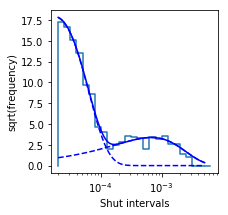

In [18]:
fig = ekplot.histogram_xlog_ysqrt_data(short_shuttings, rec.tres, epdf2a, xlabel='Shut intervals')

### Bursts

In [19]:
br = ekrecord.Bursts(rec.periods)
br.slice_bursts(0.00279)
print(br)

tcrit= 2.790 ms; number of bursts = 3965; 
mean length = 0.786141 ms; 
mean Popen = 0.974
mean number of openings = 1.33


In [20]:
blength = br.get_list_length()

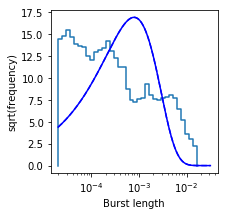

In [21]:
fig = ekplot.histogram_xlog_ysqrt_data(blength, rec.tres, xlabel='Burst length')

In [22]:
tau3, area3 = [4e-5, 3e-4, 1e-2], [0.3, 0.3]
epdf3 = exponentials.ExponentialPDF(tau3, area3)
epdf3.fit(blength)

Start LogLikelihood = -26671.773643748744
Optimization terminated successfully.
Final LogLikelihood = -27333.839342

Tau = 0.000020; lambda (1/s)= 50989.395872
Area= 0.418712; predicted number of intervals = 2421.890;amplitude (1/s) = 21349.858
Tau = 0.000173; lambda (1/s)= 5769.598058
Area= 0.410710; predicted number of intervals = 2375.607;amplitude (1/s) = 2369.631
Tau = 0.002771; lambda (1/s)= 360.918698
Area= 0.170578; predicted number of intervals = 986.650;amplitude (1/s) = 61.565

Overall mean = 0.000552
Predicted true number of events =  5784.147371726735
Number of fitted =  3965
Predicted number below Ylow = 1815.895; predicted number above Yhigh = 3.252


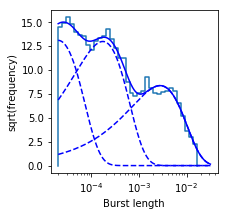

In [23]:
fig = ekplot.histogram_xlog_ysqrt_data(blength, rec.tres, epdf3, xlabel='Burst length')

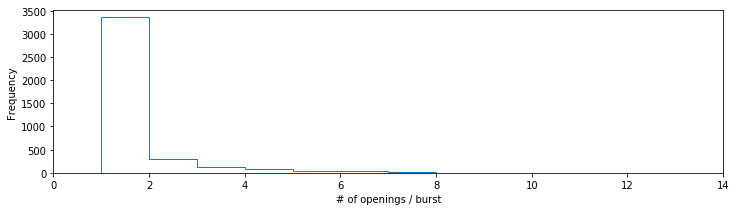

In [24]:
nops = br.get_list_number_openings()
fig = ekplot.burst_number_of_openings(nops)